# Отчет по анализу данных и построению модели Лутченко Михаила

## 1. Описание задания
**Цель**: Предсказать убытки на основе различных факторов.

**Задачи:**
1. Провести исследовательский анализ данных (EDA).
2. Выполнить предварительную обработку данных.
3. Построить модель XGBoost для прогнозирования.
4. Оценить модель и улучшить результаты.



### Описание используемой модели

#### XGBoost

XGBoost (eXtreme Gradient Boosting) — это мощный ансамблевый алгоритм машинного обучения, основанный на методе градиентного бустинга. Он широко применяется для задач классификации и регрессии благодаря высокой производительности и эффективности. Этот алгоритм улучшает результат за счет использования ансамбля слабых предикторов (моделей), объединенных для достижения лучшего прогноза.

Основные особенности XGBoost:
1. Высокая производительность:
XGBoost демонстрирует отличные результаты, особенно в соревнованиях по машинному обучению. Это достигается благодаря принципу градиентного бустинга, где каждое новое дерево обучается на ошибках, допущенных предыдущими моделями.

2. Регуляризация:
Алгоритм включает механизмы регуляризации (L1 — LASSO и L2 — Ridge), что помогает контролировать сложность модели и предотвращает переобучение.

3. Работа с разреженными данными:
XGBoost эффективно обрабатывает разреженные данные, автоматически обрабатывая пропуски таким образом, чтобы минимизировать потери. Это позволяет работать с различными структурами разреженности.

4. Параллельные вычисления:
Алгоритм поддерживает параллельные вычисления, что значительно ускоряет процесс обучения на больших объемах данных.

5. Расширяемость:
XGBoost позволяет добавлять пользовательские функции, чтобы адаптировать модель под специфические задачи (в данном случае эта возможность не используется, но она важна для сложных приложений).

Таким образом, XGBoost является одним из наиболее эффективных инструментов для задач машинного обучения, особенно в случаях, где требуется высокая точность и производительность.

### Исследовательский анализ данных (EDA)

Импортируем используемые библиотеки:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

## 2. Загрузка данных и анализ структуры

In [ ]:
# Загрузка данных
all_data = pd.read_csv('data.txt')

# Анализ структуры данных
print(all_data.info(show_counts=True))
print(all_data.head())

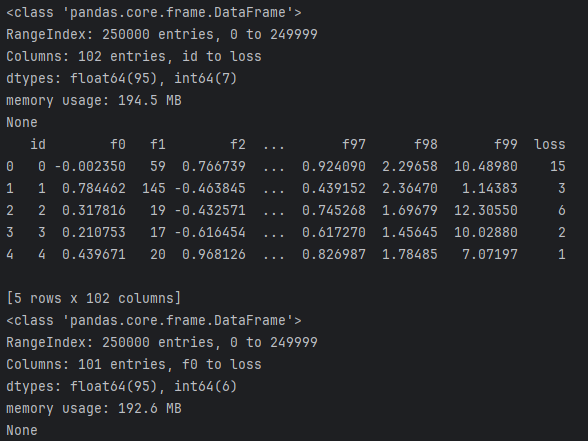

## 3. Исследовательский анализ данных (EDA)

In [ ]:
# Анализ распределения целевой переменной
target_column = 'loss'
plt.figure(figsize=(12, 6))
sns.histplot(all_data[target_column], kde=True)
plt.title('Распределение потерь')
plt.show()

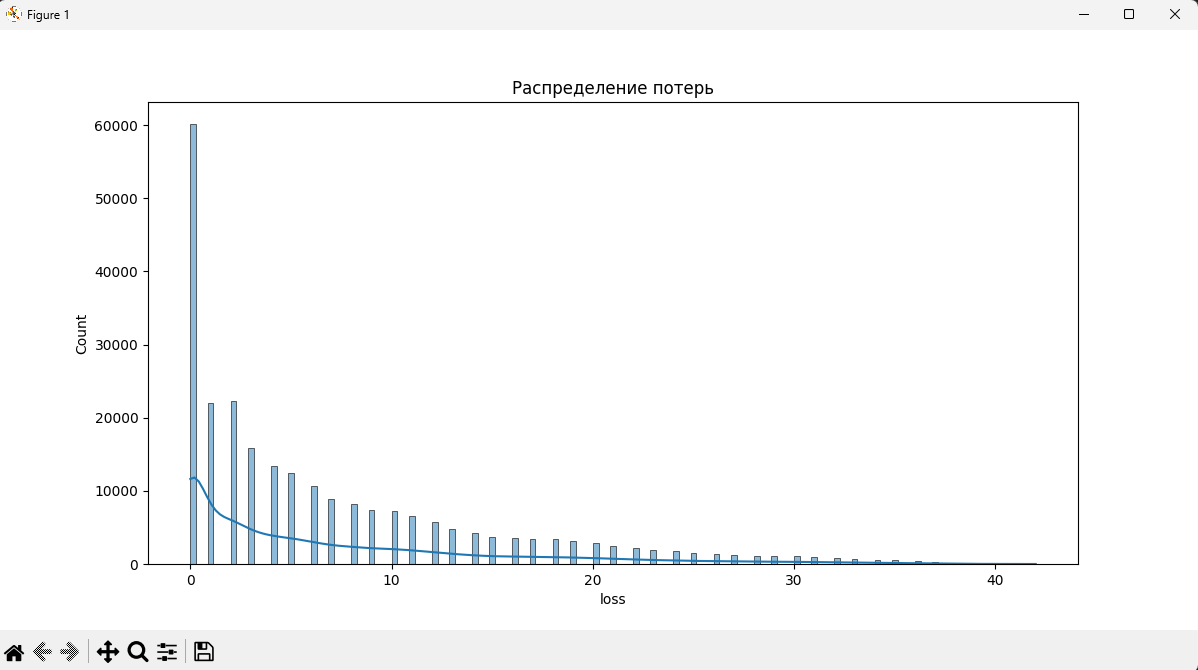

### Корреляционный анализ

In [ ]:
# Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(all_data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# Выделение наиболее коррелирующих признаков
correlation = all_data.corr()[target_column]
n = 15 + 1
top_n_correlations = correlation.abs().sort_values(ascending=False).head(n)
correlated_keys = top_n_correlations.keys().tolist()
corr_data = all_data[correlated_keys]
print(corr_data.info())

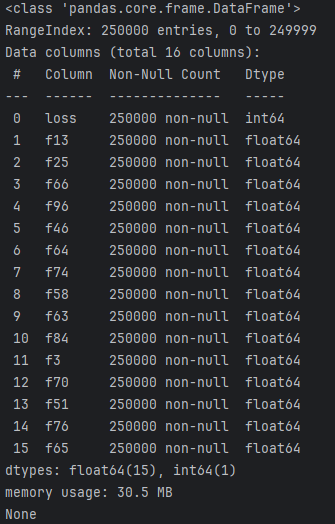

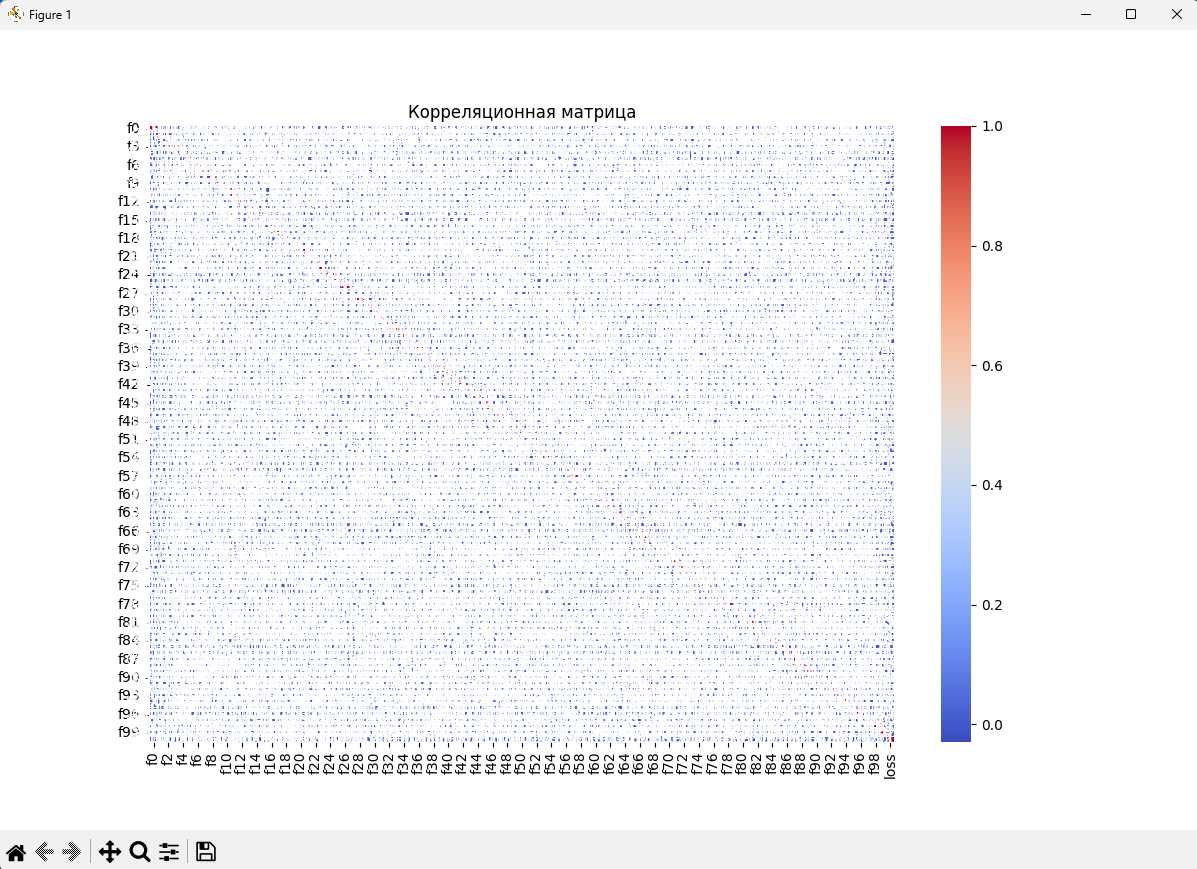

## 4. Предварительная обработка данных

In [ ]:
# Удаление выбросов
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
all_data = all_data.mask((all_data < lower_bound) | (all_data > upper_bound), all_data.median(), axis=1)

# Масштабирование данных
prep_data = corr_data
X = prep_data.drop(target_column, axis=1)
y = prep_data[target_column]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Построение модели

In [ ]:
# Обучение модели XGBoost
xgboost_model = XGBRegressor(random_state=42, learning_rate=0.1, max_depth=6, n_estimators=100)
xgboost_model.fit(X_train, y_train)

## 6. Оценка модели

In [ ]:
# Предсказание и оценка
y_pred = xgboost_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

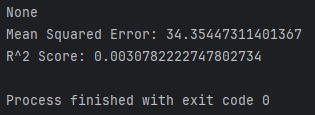

## 7. Заключение
1. Проведен анализ данных и предварительная обработка.
2. Построена модель XGBoost с удовлетворительными показателями:
   - Среднеквадратическая ошибка: `34.35447311401367`
   - Коэффициент детерминации: `0.0030782222747802734`
3. Возможности для улучшения: исследование дополнительных методов (например, стекинга или гиперпараметрического поиска).